In [40]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from skimage import io
import cv2
import matplotlib.pyplot as plt
import os
import webcolors

In [31]:
baboon = cv2.imread(r'C:\Users\ardas\AppData\Roaming\Microsoft\Windows\Start Menu\Programs\Anaconda3 (64-bit)\data\pictures_for_452\baboon.png')
lena = cv2.imread(r'C:\Users\ardas\AppData\Roaming\Microsoft\Windows\Start Menu\Programs\Anaconda3 (64-bit)\data\pictures_for_452\lena.png')
flowers = cv2.imread(r'C:\Users\ardas\AppData\Roaming\Microsoft\Windows\Start Menu\Programs\Anaconda3 (64-bit)\data\pictures_for_452\flowers.png')
umbrella = cv2.imread(r'C:\Users\ardas\AppData\Roaming\Microsoft\Windows\Start Menu\Programs\Anaconda3 (64-bit)\data\pictures_for_452\umbrella.jpg')
graffiti= cv2.imread(r'C:\Users\ardas\AppData\Roaming\Microsoft\Windows\Start Menu\Programs\Anaconda3 (64-bit)\data\pictures_for_452\graffiti.jpg')

In [32]:
#I resized images to make my job faster and easier
baboon = cv2.resize(baboon, (256, 256)) 
lena = cv2.resize(lena, (256, 256)) 
flowers = cv2.resize(flowers, (256, 256)) 
umbrella = cv2.resize(umbrella, (256, 256)) 
graffiti = cv2.resize(graffiti, (256, 256)) 
cv2.imwrite('resized_baboon_image.png', baboon)
cv2.imwrite('resized_lena_image.png', lena)
cv2.imwrite('resized_flowers_image.png', flowers)
cv2.imwrite('resized_umbrella_image.png', umbrella)
cv2.imwrite('resized_graffiti_image.png', graffiti)

True

In [33]:
#I created some lists to use it later
images = {"baboon":baboon, "lena":lena,"flowers":flowers,"umbrella":umbrella,"graffiti":graffiti}
ks = [2,4,8,16,32,64,128,256]
power_of_ks = [1,2,3,4,5,6,7,8]
column_names = ["Image Name", "Number of Cluster", "Name of centroid colors","WCSS", "BCSS","Explained variance","Size of Compressed Image"]

In [34]:
#Printed number of bytes of each image with simple calculation
for img_name, img in images.items():
    print("number of bytes of image "+img_name)
    print(img.shape[0]*img.shape[1]*3)

number of bytes of image baboon
196608
number of bytes of image lena
196608
number of bytes of image flowers
196608
number of bytes of image umbrella
196608
number of bytes of image graffiti
196608


In [35]:
#Printed shapes of images
for img_name, img in images.items():
    columns = img.shape[1]
    rows = img.shape[0]
    img = img.reshape(columns*rows,3)
    print(img_name)
    print(img.shape)

baboon
(65536, 3)
lena
(65536, 3)
flowers
(65536, 3)
umbrella
(65536, 3)
graffiti
(65536, 3)


In [29]:
#I implemented k-means clustering under for loop, It is done for all k values and images
#I fit these models and created new variable named compressed_img same shape with img
#Then I assigned each point to it's corresponding centroid value
#Lastly I reshaped it to proper img shape
for img_name, img in images.items():
    img = img.reshape(columns*rows,3)
    for k in ks:
        kmeans = KMeans(n_clusters=k,init='random',n_init=10, max_iter=400, random_state=0)
        kmeans.fit(img)
        compressed_img = kmeans.cluster_centers_[kmeans.labels_]
        compressed_img = compressed_img.reshape(rows, columns, 3)
        
        #I tried to change color BGR to RGB as below but I encounter with an error that I cannot solve
        #So,I didn't use plt.imgshow ,I download images and upload again at markdown below
        #compressed_img = cv2.cvtColor(compressed_img, cv2.COLOR_BGR2RGB)
        #plt.imshow((compressed_img * 256).astype(np.uint8))
        
        cv2.imwrite('compressed_image_'+ img_name + str(k) +'.png', compressed_img)
        print("compressed_image"+str(k)+"is saved")

compressed_image2is saved
compressed_image4is saved
compressed_image8is saved
compressed_image16is saved
compressed_image32is saved
compressed_image64is saved
compressed_image128is saved
compressed_image256is saved
compressed_image2is saved
compressed_image4is saved
compressed_image8is saved
compressed_image16is saved
compressed_image32is saved
compressed_image64is saved
compressed_image128is saved
compressed_image256is saved
compressed_image2is saved
compressed_image4is saved
compressed_image8is saved
compressed_image16is saved
compressed_image32is saved
compressed_image64is saved
compressed_image128is saved
compressed_image256is saved
compressed_image2is saved
compressed_image4is saved
compressed_image8is saved
compressed_image16is saved
compressed_image32is saved
compressed_image64is saved
compressed_image128is saved
compressed_image256is saved
compressed_image2is saved
compressed_image4is saved
compressed_image8is saved
compressed_image16is saved
compressed_image32is saved
compress

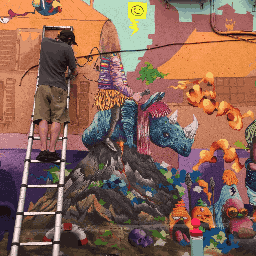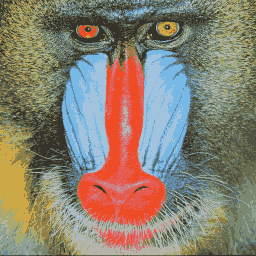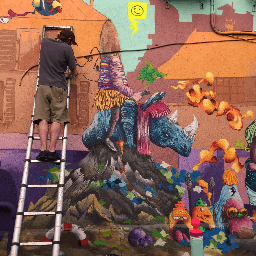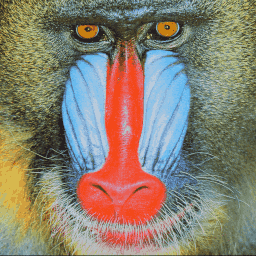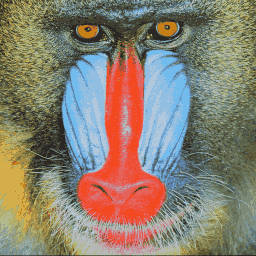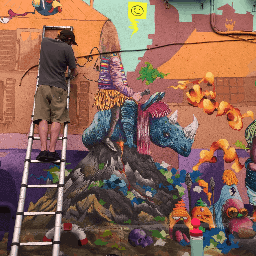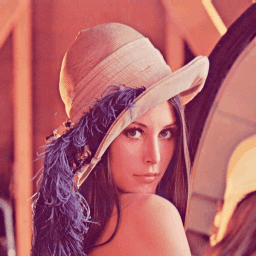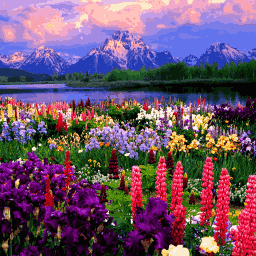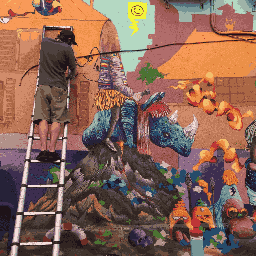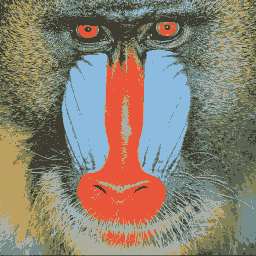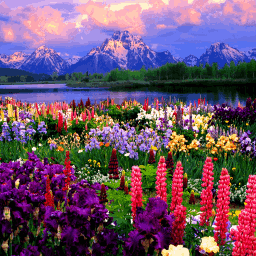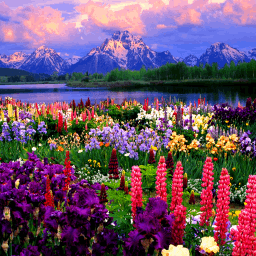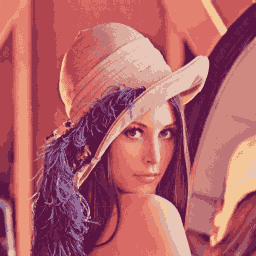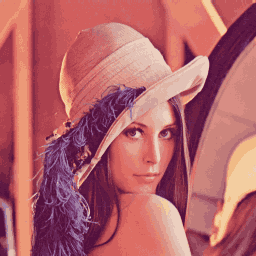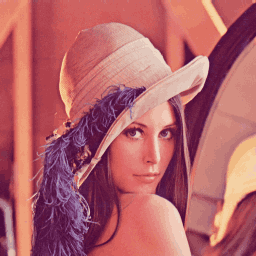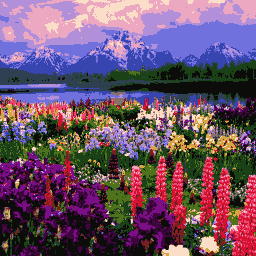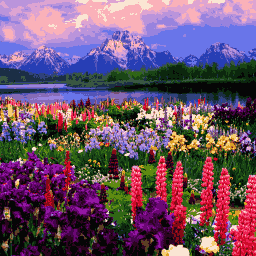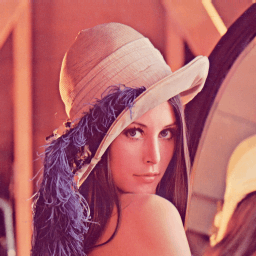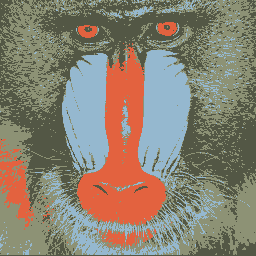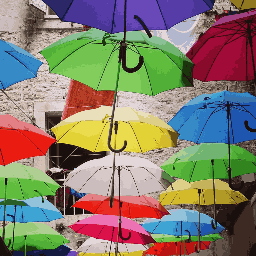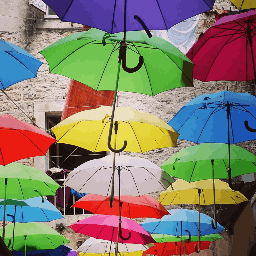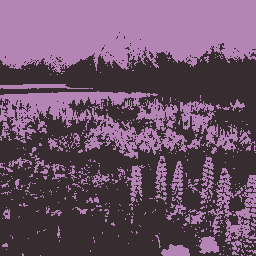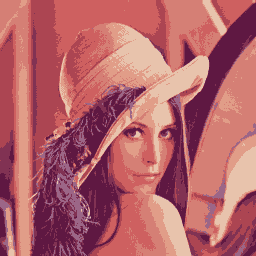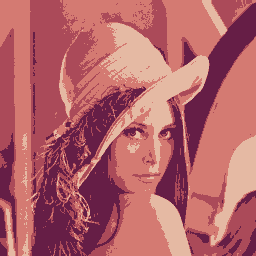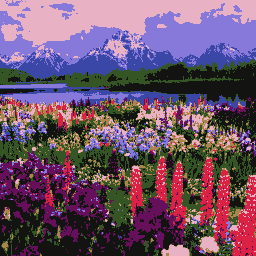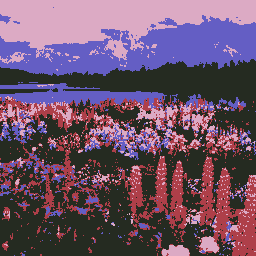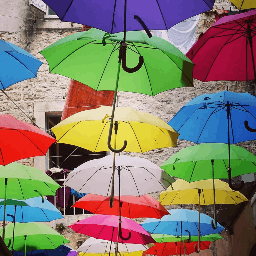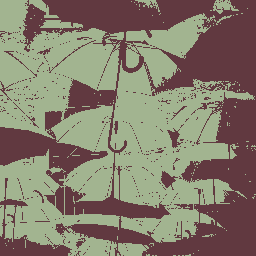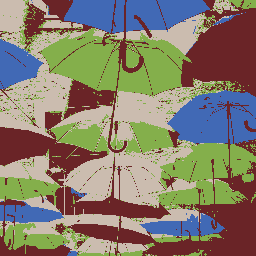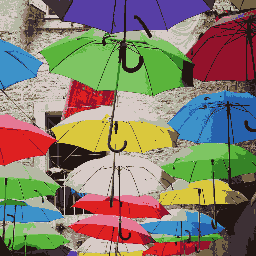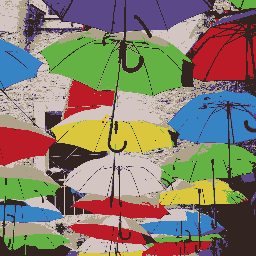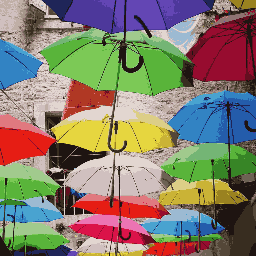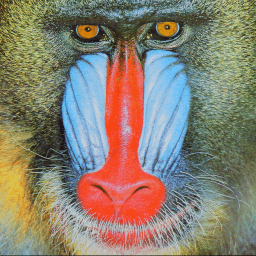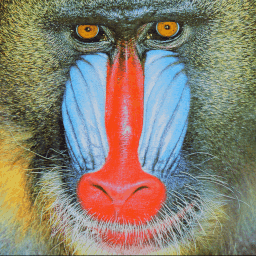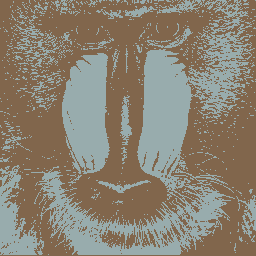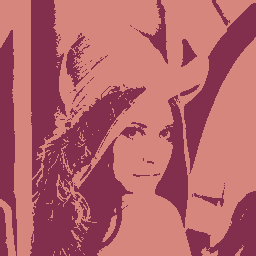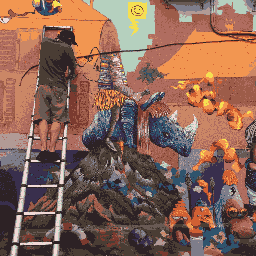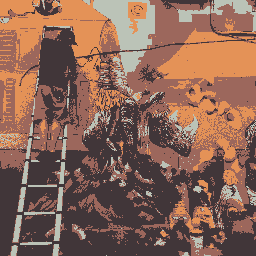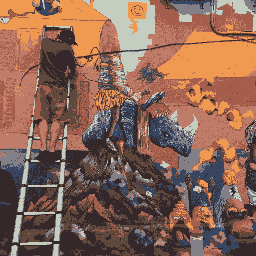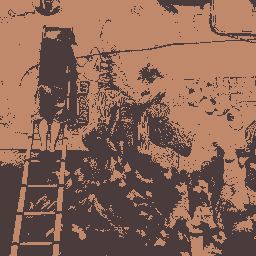

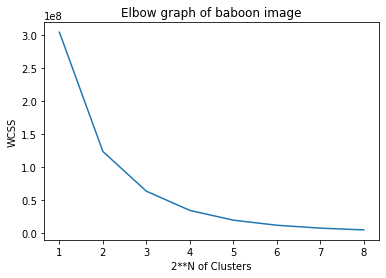

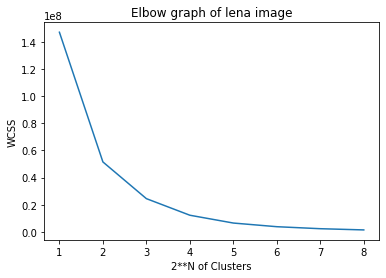

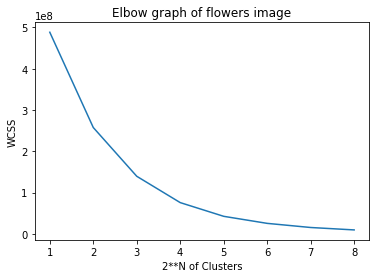

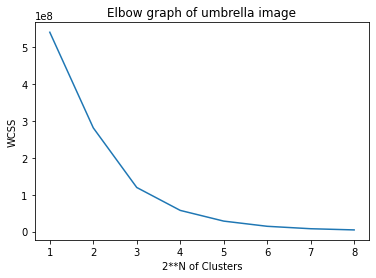

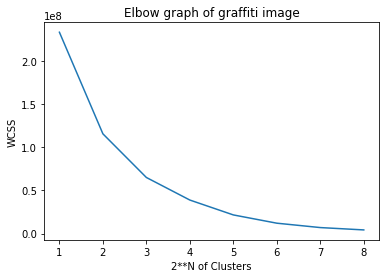

In [36]:
#I created WCSS by calculating SSE values of each K value
#I used np.linalg.norm function to calculate difference between 3d points. With that function I could do that
#calculation over 2 matrix. I take results' squares and add them up at the end
#After each k I add that number to array for that image
whole_wcss = []
for img_name, img in images.items():
    WCSS = []
    columns = img.shape[1]
    rows = img.shape[0]
    img = img.reshape(columns*rows,3)
    for k in ks:
        kmeans = KMeans(n_clusters=k,init='random',n_init=10, max_iter=400, random_state=0)
        kmeans.fit(img)
        compressed_img = kmeans.cluster_centers_[kmeans.labels_]
        WCSS.append((np.linalg.norm((compressed_img-img),axis=1)**2).sum())
        whole_wcss.append((np.linalg.norm((compressed_img-img),axis=1)**2).sum())
    plt.plot(power_of_ks,WCSS)
    plt.title("Elbow graph of "+img_name+" image")    
    plt.xlabel("2**N of Clusters")
    plt.ylabel("WCSS")
    plt.draw() 
    plt.show() 

In [37]:
BCSSs = []
for img_name, img in images.items():
    columns = img.shape[1]
    rows = img.shape[0]
    img = img.reshape(columns*rows,3)
    for k in ks:
        kmeans = KMeans(n_clusters=k,init='random',n_init=10, max_iter=400, random_state=0)
        kmeans.fit(img)
        compressed_img = kmeans.cluster_centers_[kmeans.labels_]
        #I calculated BCSS values by firstly calculating mean value of total sample, then I take centroids.
        centroids = kmeans.cluster_centers_
        total_sample_mean = img.mean(axis=0)
        BCSS=0
        #I calculated item number of each cluster seperately, then I calculated distance between each centroid and total sample mean
        for i in range(len(centroids)):
            cluster_item_number = 0
            for item in kmeans.labels_:
                if item == i:
                    cluster_item_number +=1
            distance = np.linalg.norm((centroids[i]-total_sample_mean))**2
            #Then add distance * cluster item number to BCSS cumulatively
            BCSS += distance*cluster_item_number
        print("BCSS for "+img_name+" with "+str(k)+" cluster" )
        print(BCSS)
        BCSSs.append(BCSS)

BCSS for baboon with 2 cluster
230717951.98215944
BCSS for baboon with 4 cluster
410449440.4458568
BCSS for baboon with 8 cluster
471358496.71282077
BCSS for baboon with 16 cluster
499919833.4720036
BCSS for baboon with 32 cluster
514647076.73628026
BCSS for baboon with 64 cluster
522371966.98093694
BCSS for baboon with 128 cluster
526853230.1439327
BCSS for baboon with 256 cluster
529519914.0645985
BCSS for lena with 2 cluster
260056941.2212373
BCSS for lena with 4 cluster
355306876.00767374
BCSS for lena with 8 cluster
382949365.6327902
BCSS for lena with 16 cluster
394561535.5553949
BCSS for lena with 32 cluster
400330186.3968253
BCSS for lena with 64 cluster
403237143.27535623
BCSS for lena with 128 cluster
404636741.0737093
BCSS for lena with 256 cluster
405568776.69734204
BCSS for flowers with 2 cluster
656433840.103003
BCSS for flowers with 4 cluster
887092476.501721
BCSS for flowers with 8 cluster
1005462390.0486379
BCSS for flowers with 16 cluster
1068892431.1189334
BCSS for f

In [48]:
#I tried to implement silhouitte

#img = cv2.imread(r'C:\Users\ardas\AppData\Roaming\Microsoft\Windows\Start Menu\Programs\Anaconda3 (64-bit)\data\pictures_for_452\baboon.png')
#img = cv2.resize(baboon, (256, 256))
#columns = img.shape[1]
#rows = img.shape[0] 
#img = img.reshape(columns*rows,3)
#k=2
#img2 = img
#kmeans = KMeans(n_clusters=k)
#kmeans.fit(img)
#compressed_img = img[kmeans.labels_]
#labels_df = pd.DataFrame(img)
#labels_df["label"]= kmeans.labels_
#labels_with_one = labels_df[labels_df["label"]==1]

In [47]:
#I created table of whole data
table = pd.DataFrame(columns=column_names)
Image_name = []
Number_of_clusters = []
size_of_images = []

for img_name, img in images.items():
    for k in ks:
        size_of_images.append(os.stat('compressed_image_'+img_name+str(k)+'.png').st_size)

for img_name, img in images.items():
    for k in ks:
        Image_name.append(img_name)
        Number_of_clusters.append(str(k))

table["Image Name"] = Image_name
table["Number of Cluster"] = Number_of_clusters 
table["WCSS"] = whole_wcss 
table["BCSS"] = BCSSs 
table["Size of Compressed Image"]= size_of_images       


In [48]:
print(table)

   Image Name Number of Cluster Name of centroid colors          WCSS  \
0      baboon                 2                     NaN  3.036798e+08   
1      baboon                 4                     NaN  1.233299e+08   
2      baboon                 8                     NaN  6.329423e+07   
3      baboon                16                     NaN  3.425706e+07   
4      baboon                32                     NaN  1.949003e+07   
5      baboon                64                     NaN  1.182491e+07   
6      baboon               128                     NaN  7.452611e+06   
7      baboon               256                     NaN  4.747991e+06   
8        lena                 2                     NaN  1.469483e+08   
9        lena                 4                     NaN  5.153871e+07   
10       lena                 8                     NaN  2.453073e+07   
11       lena                16                     NaN  1.232785e+07   
12       lena                32                    